# Time Series Analyzis

In [1]:
import pandas as pd

In [2]:
sp_500_index_data = pd.read_csv("sp500_index.csv")
sp_500_index_data = sp_500_index_data.rename(columns={"S&P500":"Value"})
sp_500_index_data

,Date,Value
0,2013-07-25,1690.25
1,2013-07-26,1691.65
2,2013-07-29,1685.33
3,2013-07-30,1685.96
4,2013-07-31,1685.73
...,...,...
2511,2023-07-18,4554.98
2512,2023-07-19,4565.72
2513,2023-07-20,4534.87
2514,2023-07-21,4536.34


## Time Series Plot

In [3]:
import matplotlib.pyplot as plt
import numpy as np

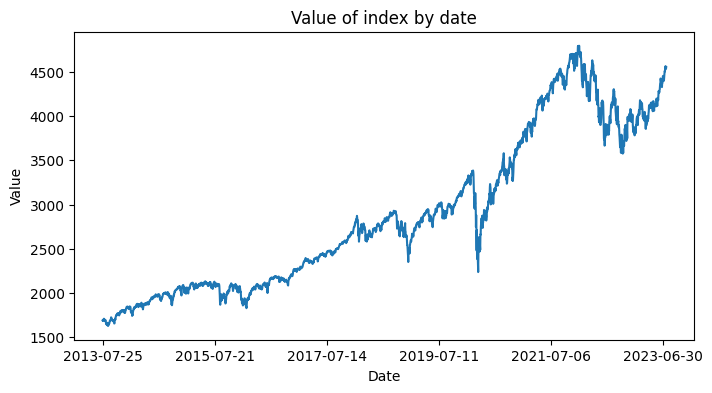

In [4]:
# Setting the figure size
fig, ax = plt.subplots(1, figsize = (8, 4))

# Plotting the time series of given data
plt.plot(sp_500_index_data["Date"],sp_500_index_data["Value"])
 
# Giving title to the chart using plt.title
plt.title('Value of index by date')

# Setting the number of ticks
ax.xaxis.set_major_locator(plt.AutoLocator())

# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

#### <font color='#008B8B'>Time Series Plot seems to have increasing trend.</font>

## All the main plots for main data

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
data = sp_500_index_data["Value"]

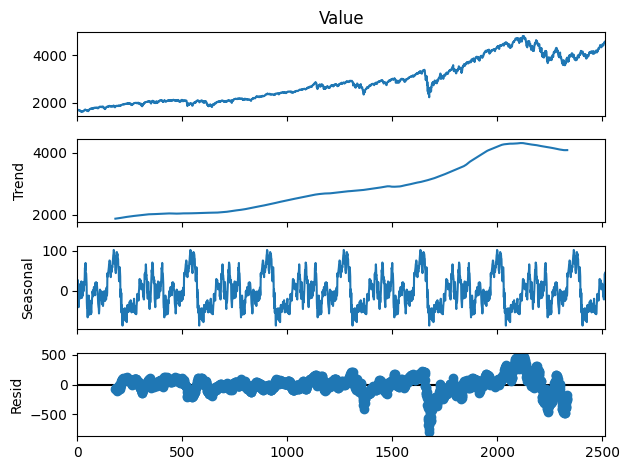

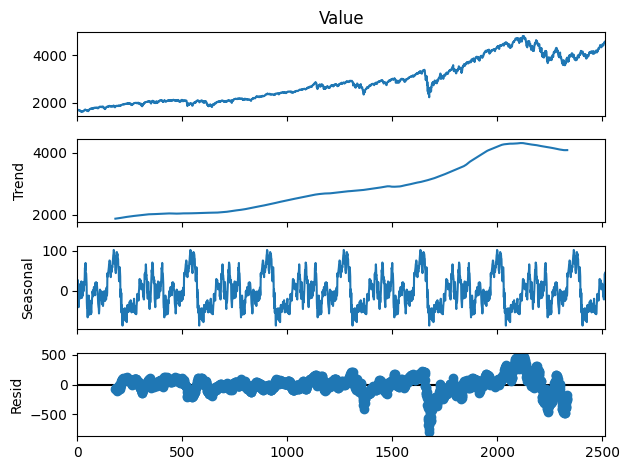

In [7]:
decomoposition = seasonal_decompose(data,period=365)
decomoposition.plot()

## Autocorrelation

In [8]:
import statsmodels.api as sm

In [9]:
acf = sm.tsa.stattools.acf(data,nlags=100)

In [10]:
acf

array([1.        , 0.9981575 , 0.99648483, 0.99472998, 0.99297402,
       0.99129799, 0.98961127, 0.98807445, 0.98635543, 0.98482069,
       0.98310793, 0.98151194, 0.97987923, 0.97823032, 0.97662212,
       0.97493295, 0.97334899, 0.97173134, 0.97017462, 0.96855202,
       0.9669767 , 0.96540657, 0.96374365, 0.96222695, 0.96067514,
       0.95914643, 0.95764462, 0.95623478, 0.9547739 , 0.9533532 ,
       0.95197847, 0.95063926, 0.94938597, 0.94815223, 0.9469295 ,
       0.94565565, 0.94440743, 0.94313654, 0.94188285, 0.94063448,
       0.93946137, 0.93832968, 0.93724676, 0.93606877, 0.93489104,
       0.93373458, 0.932561  , 0.93147047, 0.93030927, 0.9291908 ,
       0.92807799, 0.92696086, 0.92583889, 0.92466248, 0.92348206,
       0.92232665, 0.9212037 , 0.9200412 , 0.91887057, 0.91774408,
       0.91664319, 0.91567096, 0.9146295 , 0.91364097, 0.91254106,
       0.91146458, 0.91038402, 0.90927341, 0.9081982 , 0.90711295,
       0.90601567, 0.90491705, 0.90381919, 0.90268191, 0.90156

<StemContainer object of 3 artists>

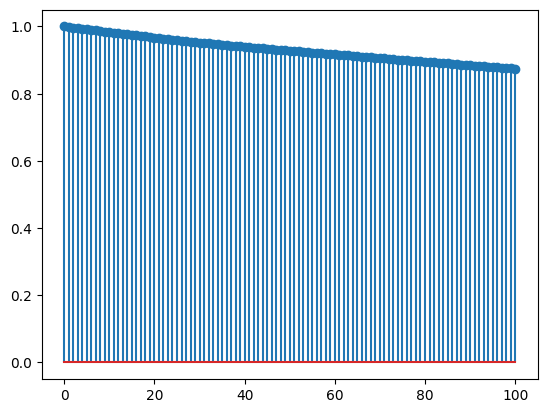

In [11]:
plt.stem(range(0,len(acf)),acf)

#### <font color='#008B8B'>Autocorrelation and dependency from past values is decreasing. No peaking is visible.</font>

## Augmented Dickey-Fuller (ADF) test

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adf_test(series):
    test_results = adfuller(series)
    print('ADF Statistic : ', test_results[0])
    print ('P Value : ', test_results [1])
    print ('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f'%(thres, adf_stat))

In [14]:
adf_test(data)

ADF Statistic :  -0.4071982191291465
P Value :  0.9088899774081827
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


#### <font color='#008B8B'>The ADF statistic is higher than any of the critical values and p-value > 0.05 implies that the time series is in fact</font> <font color='#B22222'>non-stationary</font>.

## Trend removement

In [15]:
rolling_mean = data.rolling(window=365).mean()

<Axes: title={'center': 'Rolling Mean over 12 month period'}>

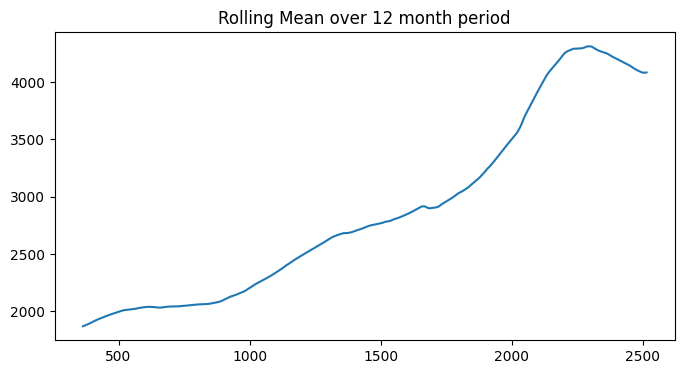

In [16]:
rolling_mean.plot(figsize=(8,4), title="Rolling Mean over 12 month period")

#### <font color='#008B8B'>Mean value increases and there is a visuable trend.</font>

In [17]:
detrended = data - rolling_mean

<Axes: title={'center': 'Plot without a trend'}>

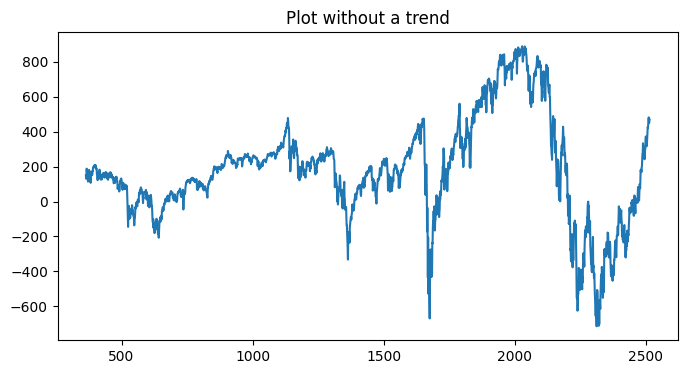

In [18]:
detrended.plot(figsize=(8,4), title="Plot without a trend")

---------------------------------------------------------------------------------------------------------------

In [19]:
detrended = detrended[detrended.notnull()]

In [20]:
acf2 = sm.tsa.stattools.acf(detrended)

In [21]:
acf2

array([1.        , 0.99199035, 0.98561566, 0.97843525, 0.971478  ,
       0.96527838, 0.95858478, 0.9532973 , 0.94616063, 0.94073276,
       0.93321543, 0.92665306, 0.91966405, 0.91260781, 0.90618643,
       0.89905141, 0.89310243, 0.8864466 , 0.88036807, 0.87355241,
       0.86692887, 0.86042065, 0.85314907, 0.84733258, 0.8414907 ,
       0.83601071, 0.83089123, 0.82635996, 0.82122902, 0.81620877,
       0.81136607, 0.80686151, 0.80297611, 0.79933528])

<StemContainer object of 3 artists>

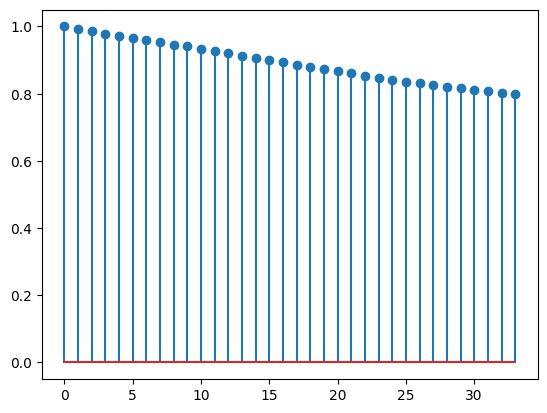

In [22]:
plt.stem(range(0,len(acf2)),acf2)

#### <font color='#008B8B'>There is still autocorrelation between values but trend is removed.</font>

## Seasonality removement

<Axes: >

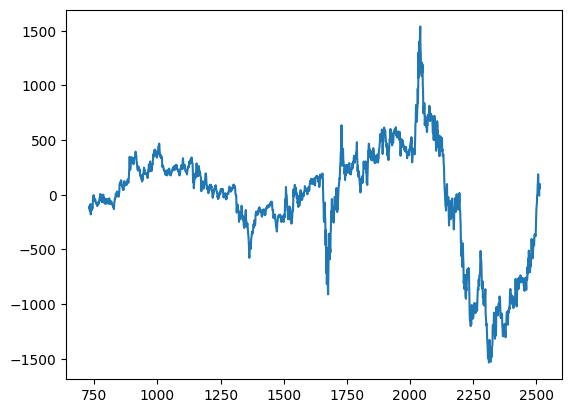

In [23]:
data_cleared = detrended.diff(periods=365)
data_cleared = data_cleared[data_cleared.notnull()]
data_cleared.plot()

<StemContainer object of 3 artists>

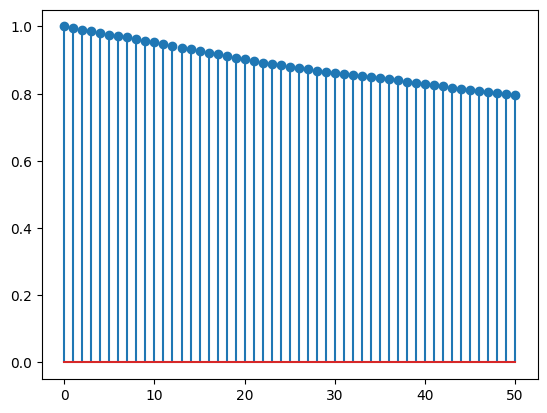

In [24]:
acf3 = sm.tsa.stattools.acf(data_cleared,nlags=50)
plt.stem(range(0,len(acf3)),acf3)

## ARIMA models

### Checking for the best fitting model for original data

In [25]:
from pmdarima.arima import auto_arima

In [26]:
model_org = auto_arima(data,trace=True,suppress_warnings=True)
results_org = model_org.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24823.153, Time=3.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24933.909, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24909.741, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24911.884, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24934.668, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24909.101, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24909.420, Time=0.93 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24824.844, Time=3.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24908.496, Time=3.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24908.438, Time=1.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=24907.760, Time=2.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24909.114, Time=1.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=24825.709, Time=5.21 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=24824.325, Time=1.14 sec

Best model:  ARIMA

### Predictions

In [27]:
predictions_org = model_org.predict(n_periods = 365)

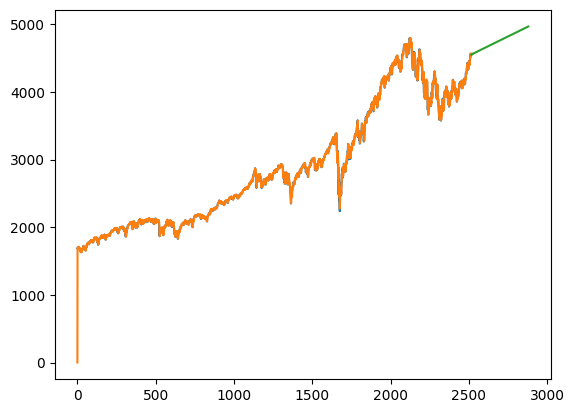

In [28]:
plt.plot(data)
plt.plot(results_org.fittedvalues())
plt.plot(predictions_org)

In [29]:
results_org.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2516
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -12405.577
Date:                Tue, 25 Jul 2023   AIC                          24823.153
Time:                        18:14:40   BIC                          24858.133
Sample:                             0   HQIC                         24835.849
                               - 2516                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.1450      2.411      1.719      0.086      -0.581       8.871
ar.L1         -1.7584      0.016   -106.673      0.000      -1.791      -1.726
ar.L2         -0.8832      0.015    -57.294      0.000      -0.913      -0.853
ma.L1          1.6864      0.021     80.645      0.000       1.645       1.727
ma.L2          0.7897      0.020     39.908      0.000       0.751       0.829
sigma2      1126.9273     16.069     70.128      0.000    1095.432    1158.423
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              6079.27
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               7.86   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Checking for the best fitting model for cleared data

In [30]:
model_cleared = auto_arima(data_cleared,trace=True,suppress_warnings=True)
results_cleared = model_cleared.fit(data_cleared)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19012.930, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19148.046, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19122.858, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19127.059, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19146.055, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19111.623, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19113.464, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19011.682, Time=1.93 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19113.901, Time=1.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=19013.467, Time=3.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=19111.687, Time=3.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=19110.606, Time=1.89 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=19044.087, Time=1.58 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=19015.307, Time=3.56 sec
 ARIMA(3,1,2)(0,0,0

#### <font color='#008B8B'>Based on AIC values the best fitting model is ARIMA(3,1,2).</font>

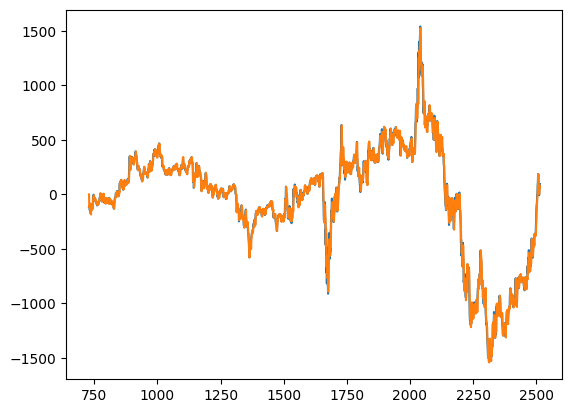

In [31]:
plt.plot(data_cleared)
plt.plot(results_cleared.fittedvalues())

In [32]:
results_cleared.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1787
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -9498.844
Date:                Tue, 25 Jul 2023   AIC                          19009.689
Time:                        18:15:18   BIC                          19042.615
Sample:                             0   HQIC                         19021.848
                               - 1787                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6948      0.037    -45.889      0.000      -1.767      -1.622
ar.L2         -0.7875      0.051    -15.584      0.000      -0.887      -0.688
ar.L3          0.0534      0.020      2.635      0.008       0.014       0.093
ma.L1          1.6380      0.033     49.546      0.000       1.573       1.703
ma.L2          0.7512      0.031     24.450      0.000       0.691       0.811
sigma2      2437.8537     50.709     48.075      0.000    2338.465    2537.242
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               961.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.33   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Checking residuals

In [33]:
residuals = results_cleared.resid()

<Axes: >

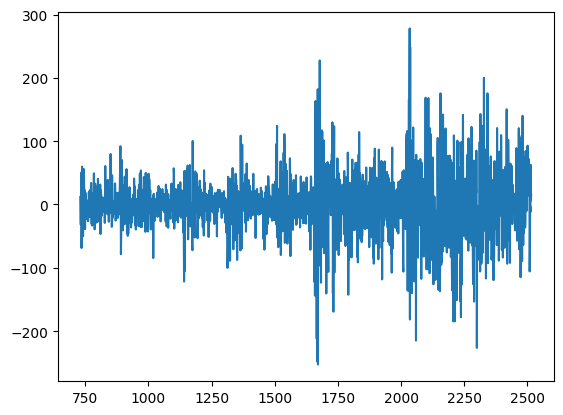

In [34]:
residuals[1:].plot()

### Correlation Matrix

In [35]:
correlation_matrix = np.corrcoef(residuals[:-1],residuals[1:])

In [36]:
correlation_matrix

array([[1.00000000e+00, 3.05825095e-05],
       [3.05825095e-05, 1.00000000e+00]])